In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_reg import load_data, evaluate

## Import data from train.txt and test.txt

In [2]:
x_train, y_train = load_data('train.txt')
x_test, y_test = load_data('test.txt')

In [3]:
x_train.shape

(300,)

## Plot the training set and the test set

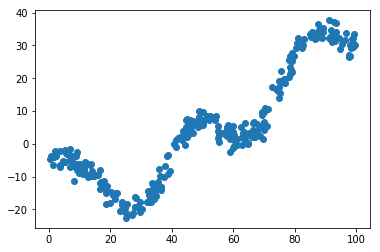

In [4]:
plt.scatter(x_train, y_train)
plt.show()

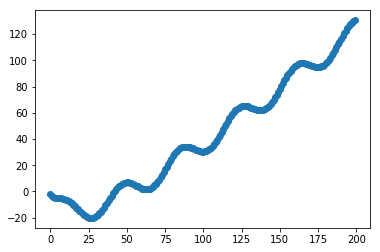

In [5]:
plt.scatter(x_test, y_test)
plt.show()

## Test the data on different models

In [1]:
from base import *
import numpy as np
import matplotlib.pyplot as plt
from linear_reg import load_data, evaluate

**Define the test functions**
记得一定要在判断条件那里加上对应的模型名字，如果模型不在提供的范围内，则直接 `throw Exception`

In [4]:
def test(model, lr):
    
    assert type(model) is str
    
    train_file = 'train.txt'
    test_file = 'test.txt'

    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
#     f = main(x_train, y_train)
    if model == 'power':
        f = power(x_train, y_train, epochs=100000, Print=True, learning_rate=lr)
    else:
        raise Exception

    # 计算预测的输出值
    y_test_pred = f(x_test)

    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    # 显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

### Polynomial base functions

For this question, the learning rate should not be too large, say 0.001, otherwise, this alg diverge; or I can norm the input first.

In [ ]:
test('power', lr=0.00005)